<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/notebooks/2020_0520_remote_rendering_gym_envs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- source: https://davidrpugh.github.io/stochastic-expatriate-descent/openai/binder/google-colab/2020/04/16/remote-rendering-gym-envs.html
- date: 2020-0520


# Rendering OpenAI Gym Envs on Binder and Google Colab 
> Notes on solving a mildly tedious (but important) problem

- branch: 2020-04-16-remote-rendering-gym-envs
- badges: true
- image: images/gym-colab-binder.png
- comments: true
- author: David R. Pugh
- categories: [openai, binder, google-colab]

Getting [OpenAI](https://openai.com/) [Gym](https://gym.openai.com/docs/) environments to render properly in remote environments such as [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb) and [Binder](https://mybinder.org/) turned out to be more challenging than I expected. In this post I lay out my solution in the hopes that I might save others time and effort to work it out independently.

## Install X11 system dependencies

Install necessary [X11](https://en.wikipedia.org/wiki/X_Window_System) dependencies, in particular [Xvfb](https://www.x.org/releases/X11R7.7/doc/man/man1/Xvfb.1.xhtml), which is an X server that can run on machines with no display hardware and no physical input devices. 

In [0]:
!apt-get install -y xvfb x11-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 993 kB of archives.
After this operation, 2,977 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 993 kB in 1s (1,263 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:

## Install additional Python dependencies

Now that you have installed Xvfb, you need to install a Python wrapper 
[`pyvirtualdisplay`](https://github.com/ponty/PyVirtualDisplay) in order to interact with Xvfb 
virtual displays from within Python. Next you need to install the Python bindings for 
[OpenGL](https://www.opengl.org/): [PyOpenGL](http://pyopengl.sourceforge.net/) and 
[PyOpenGL-accelerate](https://pypi.org/project/PyOpenGL-accelerate/). The former are the actual 
Python bindings, the latter is and optional set of C (Cython) extensions providing acceleration of 
common operations for slow points in PyOpenGL 3.x.

In [0]:
!pip install pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

     |████████████████████████████████| 542kB 3.9MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp36-cp36m-linux_x86_64.whl size=1593677 sha256=f8aad236856ba010f83721b62662f9034c7fa4a6d2aaf00d26ccfcfe14d8c96a
  Stored in directory: /root/.cache/pip/wheels/bd/21/77/99670ceca25fddb3c2b60a7ae44644b8253d1006e8ec417bcc
Successfully built PyOpenGL-accelerate


## Install OpenAI Gym

Next you need to install the OpenAI Gym package. Note that depending on which Gym environment you are interested in working with you may need to add additional dependencies. Since I am going to simulate the LunarLander-v2 environment in my demo below I need to install the `box2d` extra which enables Gym environments that depend on the [Box2D](https://box2d.org/) physics simulator.

In [0]:
!pip install gym[box2d]==0.17.* 

     |████████████████████████████████| 450kB 2.7MB/s 


## Create a virtual display in the background

Next you need to create a virtual display in the background which the Gym Envs can connect to for rendering purposes. You can check that there is no display at present by confirming that the value of the [`DISPLAY`](https://askubuntu.com/questions/432255/what-is-the-display-environment-variable) environment variable has not yet been set. 

In [0]:
!echo $DISPLAY

The code in the cell below creates a virtual display in the background that your Gym Envs can connect to for rendering. You can adjust the `size` of the virtual buffer as you like but you must set `visible=False` when working with Xvfb. 

**This code only needs to be run once per session to start the display.**

In [0]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

After running the cell above you can echo out the value of the `DISPLAY` environment variable again to confirm that you now have a display running.

In [0]:
!echo $DISPLAY

:1001


For convenience I have gathered the above steps into two cells that you can copy and paste into the top of you Google Colab notebooks.

In [0]:
%%bash

# install required system dependencies
apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists...
Building dependency tree...
Reading state information...
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [0]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

## Create a virtual display in the background

Next you need to create a virtual display in the background which the Gym Envs can connect to for rendering purposes. You can check that there is no display at present by confirming that the value of the [`DISPLAY`](https://askubuntu.com/questions/432255/what-is-the-display-environment-variable) environment variable has not yet been set.

In [0]:
!echo $DISPLAY

:1005


The code in the cell below creates a virtual display in the background that your Gym Envs can connect to for rendering. You can adjust the `size` of the virtual buffer as you like but you must set `visible=False` when working with Xvfb. 

**This code only needs to be run once per session to start the display.**

In [0]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_display.start()

After running the cell above you can echo out the value of the `DISPLAY` environment variable again to confirm that you now have a display running.

In [0]:
!echo $DISPLAY

# Demo

Just to prove that the above setup works as advertised I will run a short simulation. First I will define an `Agent` that chooses an action randomly from the set of possible actions and the define a function that can be used to create such agents.

In [0]:
import typing

import numpy as np


# represent states as arrays and actions as ints
State = np.array
Action = int

# agent is just a function! 
Agent = typing.Callable[[State], Action]


def uniform_random_policy(state: State,
                          number_actions: int,
                          random_state: np.random.RandomState) -> Action:
    """Select an action at random from the set of feasible actions."""
    feasible_actions = np.arange(number_actions)
    probs = np.ones(number_actions) / number_actions
    action = random_state.choice(feasible_actions, p=probs)
    return action


def make_random_agent(number_actions: int,
                      random_state: np.random.RandomState = None) -> Agent:
    """Factory for creating an Agent."""
    _random_state = np.random.RandomState() if random_state is None else random_state
    return lambda state: uniform_random_policy(state, number_actions, _random_state)
    

In the cell below I wrap up the code to simulate a single epsiode of an OpenAI Gym environment. Note that the implementation assumes that the provided environment supports `rgb_array` rendering (which not all Gym environments support!).

In [0]:
import gym
import matplotlib.pyplot as plt
from IPython import display


def simulate(agent: Agent, env: gym.Env) -> None:
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    done = False
    while not done:
        action = agent(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)       
    env.close()
    


Finally you can setup your desired environment...

In [0]:
lunar_lander_v2 = gym.make('LunarLander-v2')
_ = lunar_lander_v2.seed(42)

...and run a simulation!

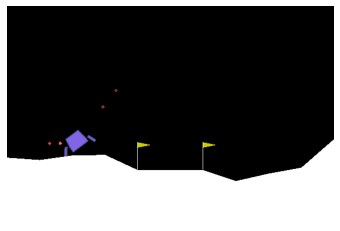

In [0]:
#random_agent = make_agent(lunar_lander_v2.action_space.n, random_state=None)
random_agent = make_random_agent(lunar_lander_v2.action_space.n, random_state=None)

simulate(random_agent, lunar_lander_v2)

Currently there appears to be a non-trivial amount of flickering during the simulation. Not entirely sure what is causing this undesireable behavior. If you have any idea how to improve this, please leave a comment below. I will be sure to update this post accordingly if I find a good fix.

In [0]:
cartpole = gym.make('CartPole-v0')
_ = cartpole.seed(42)


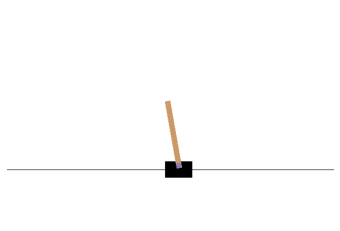

In [0]:
random_agent = make_random_agent(cartpole.action_space.n, random_state=None)
simulate(random_agent, cartpole)